In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install pyemd

In [3]:
!pip install gensim
import gensim 
from gensim.models import Word2Vec 
model = Word2Vec.load("complete_model/complete.model")

In [4]:
data = pd.read_excel('./Extracción de actores/Trabajo_delicioso_xD.xlsx')

In [5]:
data['Actor'] = data['Actor'].apply(str.upper)

In [6]:
actores = data['Actor'].unique()

In [7]:
sinonimos = {}
for actor in actores:
    try:
        sinonimos[actor] = data[data['Actor']==actor]["Sinónimos"][0].values[0]
    except Exception as e:
        sinonimos[actor] = data[data['Actor']==actor]["Sinónimos"].values

In [8]:
for actor in actores:
    try:
        sinonimos[actor]= sinonimos[actor][0]
    except Exception as e:
        pass

In [9]:
for actor in actores:
    sinonimos[actor] = sinonimos[actor].split(',')

In [10]:
sinonimos

{'ACAPAPB': ['Acapapb',
  'Asociación de cultivadores y comercializadores de Cacao y productos agrícolas de Pueblo Bello'],
 'ACESCO': ['Acesco'],
 'ADAM': ['ADAM', 'Áreas de Desarrollo Alternativo Municipal'],
 'ADR': ['ADR', ' Agencia de Desarrollo Rural'],
 'AGENCIA COLOMBIANA PARA LA REINTEGRACIÓN': ['Agencia Colombiana para la Reintegración'],
 'AGENCIA DE LOS ESTADOS UNIDOS': ['Agencia de los Estados Unidos'],
 'AGENCIA PRESIDENCIAL DE COOPERACIÓN INTERNACIONAL': ['Agencia Presidencial de Cooperación Internacional'],
 'AGROCENTRO RIVERA': ['Agrocentro Rivera'],
 'AGROCHAPARRAL': ['Agrochaparral'],
 'AGROCLOUD': ['AgroCloud'],
 'AGROCOLOMBIA PRODUCTIVA Y SOSTENIBLE': ['Agrocolombia Productiva y Sostenible'],
 'AGROINSUMOS LA TOGUERA': ['Agroinsumos la Toguera'],
 'AGRONET': ['AGRONET', 'agronet Colombia', ' agronet.gov.co'],
 'AGRONET COLOMBIA': ['AGRONET', 'agronet Colombia', ' agronet.gov.co'],
 'AGRONET.GOV.CO': ['AGRONET', 'agronet Colombia', ' agronet.gov.co'],
 'AGRONEWS': [

In [11]:
data_labels = []
for label, frame in data.groupby("File"):
    item = {'file': label}
    for actor in actores:
        item[actor] = 0
    for index, row in frame.iterrows():
        item[row["Actor"]] = 1
    data_labels.append(item)

In [12]:
df_final = pd.DataFrame(data_labels)

In [13]:
df_final.to_csv('DF_Final.csv', index=False)

In [14]:
!pip install PyPDF2

In [15]:
import PyPDF2

In [16]:
def extract_text(url):
    try:
        reader = PyPDF2.PdfFileReader(url)
        text = ''
        for i in range(reader.numPages):
            print(i)
            text=text+reader.getPage(i).extractText()
        return text
    except Exception as e:
        return 'File not found'

In [17]:
df_final['text'] = df_final['file'].apply(extract_text)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


0
1
2
3
4
5
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
0
1
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
9

In [18]:
df_final

file  ACAPAPB  ACESCO  ADAM  \
0      2269-Texto del artículo-8127-1-10-20181017.pdf        0       0     0   
1   A-tool-for-classification-of-cacao-production-...        0       0     0   
2   ACUERDO DE VOLUNTADES DE ACTORES PÚBLICO – PRI...        0       0     0   
3                              AGENDA PROSPECTIVA.pdf        0       0     0   
4   ALMACENAMIENTO DE CARBONO EN CACAOTALES (Theob...        0       0     0   
..                                                ...      ...     ...   ...   
80  Recomendaciones de política pública desde las ...        0       0     0   
81  [PDF] Cooperativismo y responsabilidad social ...        0       1     0   
82                          [PDF] ESTUDIO DE CASO.pdf        0       0     0   
83  [PDF] Estado del arte de medición de impacto d...        0       0     0   
84  mpacto y aplicación de la NIC 41 AGRICULTURA, ...        0       0     0   

    ADR  AGENCIA COLOMBIANA PARA LA REINTEGRACIÓN  \
0     0                                         0   
1     0                                         0   
2     1                                         0   
3     0                                         0   
4     0                                         0   
..  ...                                       ...   
80    0                                         0   
81    0                                         0   
82    0                                         0   
83    0                                         0   
84    0                                         0   

    AGENCIA DE LOS ESTADOS UNIDOS  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   
..                            ...   
80                              0   
81                              0   
82                              0   
83                              0   
84                              0   

    AGENCIA PRESIDENCIAL DE COOPERACIÓN INTERNACIONAL  AGROCENTRO RIVERA  \
0                                                   0                  0   
1                                                   0                  0   
2                                                   0                  0   
3                                                   0                  0   
4                                                   0                  0   
..                                                ...                ...   
80                                                  0                  0   
81                                                  0                  0   
82                                                  0                  0   
83                                                  0                  0   
84                                                  0                  0   

    AGROCHAPARRAL  ...  WORLD BANK  WCF  WFC  WORLD COCOA FOUNDATION  \
0               0  ...           0    0    0                       0   
1               0  ...           0    0    0                       0   
2               0  ...           0    0    0                       0   
3               0  ...           0    0    0                       0   
4               0  ...           0    0    0                       0   
..            ...  ...         ...  ...  ...                     ...   
80              0  ...           0    0    0                       0   
81              0  ...           1    0    0                       0   
82              0  ...           0    0    0                       0   
83              0  ...           0    0    0                       0   
84              0  ...           0    0    0                       0   

    WORLD RESOURCES INSTITUTE  WORLDS FINEST CHOCOLATE  WRI  YACOPÍ  \
0                           0                        0    0       0   
1                           0                        0    0       0   
2              

In [19]:
df_final.to_csv('Final_Data_With_Text.csv', index=False)
with_data = df_final[df_final['text'] != 'File not found']

In [20]:
with_data['text'] = with_data['text'].apply(lambda x: x.replace('\n-', ''))
with_data['text'] = with_data['text'].apply(lambda x: x.replace('\n', ''))
with_data['text'] = with_data['text'].apply(lambda x: x.replace('.', ''))
with_data['text'] = with_data['text'].apply(lambda x: x.replace(',', ''))
with_data['text'] = with_data['text'].apply(lambda x: x.replace(':', ''))
with_data['text'] = with_data['text'].apply(lambda x: x.replace(';', ''))

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:1]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:2]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:3]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [21]:
with_data.to_csv('with_text_cleaned.csv', index=False)

In [22]:
data = pd.read_csv('with_text_cleaned.csv')

In [23]:
data.drop('file', inplace=True, axis=1)

In [24]:
from nltk.corpus import stopwords

data['text'] = data['text'].apply(str.lower)

In [25]:
def clean_text(sentence):
    array_string = [w for w in sentence]
    return ''.join([str(elem) for elem in array_string])

In [26]:
data['text'] = data['text'].str.replace('\d+', '')
data['text'] = data['text'].str.replace('•', ' ')
data['text'] = data['text'].str.replace('?', ' ')
data['text'] = data['text'].str.replace('¿', ' ')

In [27]:
data['text'][1]

'  acuerdo de voluntades de actores público  privados entre el gobierno de colombia y la cadena de valor láctea para la no deforestación de bosques naturales y la no transformación de los páramos    de mayo de  los integrantes y firmantes de este acuerdo de cooperación públicoprivado compartimos la voluntad de tomar acciones individuales y colectivas para eliminar la deforestación y frenar la transformación de páramos relacionadas con la producción de lácteos en colombia  i condiciones que motivan el acuerdo  la deforestación promedio anual en colombia entre  y  fue de  hectáreas anuales y en  y  esa cifra ascendió a  hectáreas y  hectáreas respectivamente la ganadería por sus características de ocupación economía arraigo cultural ha sido uno entre otros de los motores de deforestación históricos en el país al considerar ecosistemas no boscosos del país como son las áreas de páramo la presencia de ganadería de leche se relaciona con afectaciones en términos de integridad y representati

In [28]:
data['text'] = data['text'].apply(clean_text)

In [29]:
data['text'] = data['text'].str.replace('  ', ' ')
data['text'][1]

' acuerdo de voluntades de actores público privados entre el gobierno de colombia y la cadena de valor láctea para la no deforestación de bosques naturales y la no transformación de los páramos  de mayo de los integrantes y firmantes de este acuerdo de cooperación públicoprivado compartimos la voluntad de tomar acciones individuales y colectivas para eliminar la deforestación y frenar la transformación de páramos relacionadas con la producción de lácteos en colombia i condiciones que motivan el acuerdo la deforestación promedio anual en colombia entre y fue de hectáreas anuales y en y esa cifra ascendió a hectáreas y hectáreas respectivamente la ganadería por sus características de ocupación economía arraigo cultural ha sido uno entre otros de los motores de deforestación históricos en el país al considerar ecosistemas no boscosos del país como son las áreas de páramo la presencia de ganadería de leche se relaciona con afectaciones en términos de integridad y representatividad hoy en d

In [30]:
#!pip install scikit-multilearn
import matplotlib.pyplot as plt
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import csv
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

In [31]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\%°\-&|@,;]')
STOPWORDS = set(stopwords.words('spanish'))
    
def super_cleaner(text): 
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text(
    print("cleaner:",text)
    return text


In [32]:
data['text'] = data['text'].apply(super_cleaner)

cleaner: reconocimiento territorial participativo serranía yariguíes microcuenca cinco mil santander colombia participatory territorial recognition of the serranía yariguíes cinco mil microbasin santander colombia paulina alejandra vergara buitragoingeniera ambiental especialista gestión ambiental ms c geografía universidad pedagógica tecnológica colombia grupo sistemática biológica sisbio paulinavergara uptceducoresumenla serranía yariguíes ubicada departamento santander constituye ecosistema estratégico oriente andes colombianos embargo microcuenca cinco mil ubica serranía actividad agropecuaria impactado áreas naturales protegidas presentes parque nacional natural distrito manejo integrado yariguíes investigación realizó proceso participativo zona rural microcuenca propósito sistematizar información percepciones campesinos territorio resultados muestran vinculación comunidad conocimientos conservación ecosistemas áreas naturales protegidaspalabras clave clase campesina comunidad con

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



cleaner: §moralesmachuca carlos andrés ingeniero sistemas universidad autónoma colombia estudiante maestría investigación ingeniería industrial universidad nacional colombia realiza tareas cienciometría capacidades investigativas vicerrectoría investigación universidad nacional colombia realizó estudios administración conocimiento utilizando convenio servicio nacional aprendizaje instituto tecnológico monterrey arte medición impacto estudios inteligencia tecnológica sectores productivos estratégicos colombia carlos andrés morales machuca§ universidad nacional colombia facultad ingeniería kr of edificio uriel gutiérrez bogotá colombia + camoralesm unaleducoresumen documento pretende explicar grandes rasgos conceptos relacionados sistemas inteligencia tecnológica historia diferentes perspectivas antecedentes tendencias así trabajos medición impacto país explica relación temas nueva economía gestión conocimiento innovación indica trabajos realizando actual investigación temas propios hace

In [33]:
data['text'][1]

'acuerdo voluntades actores público privados gobierno colombia cadena valor láctea deforestación bosques naturales transformación páramos mayo integrantes firmantes acuerdo cooperación públicoprivado compartimos voluntad tomar acciones individuales colectivas eliminar deforestación frenar transformación páramos relacionadas producción lácteos colombia i condiciones motivan acuerdo deforestación promedio anual colombia hectáreas anuales cifra ascendió hectáreas hectáreas respectivamente ganadería características ocupación economía arraigo cultural sido motores deforestación históricos país considerar ecosistemas boscosos país áreas páramo presencia ganadería leche relaciona afectaciones términos integridad representatividad hoy día país emprende esfuerzos importantes desligar actividad agropecuaria deforestación transformación páramos importante contar apoyo actores integran cadena valor láctea ejemplo esfuerzos últimos años promovido diversos compromisos nivel internacional cadenas pro

In [34]:
!pip install unidecode
from unidecode import unidecode
data['text'] = data['text'].apply(unidecode)

In [35]:
data['text'][1]

'acuerdo voluntades actores publico privados gobierno colombia cadena valor lactea deforestacion bosques naturales transformacion paramos mayo integrantes firmantes acuerdo cooperacion publicoprivado compartimos voluntad tomar acciones individuales colectivas eliminar deforestacion frenar transformacion paramos relacionadas produccion lacteos colombia i condiciones motivan acuerdo deforestacion promedio anual colombia hectareas anuales cifra ascendio hectareas hectareas respectivamente ganaderia caracteristicas ocupacion economia arraigo cultural sido motores deforestacion historicos pais considerar ecosistemas boscosos pais areas paramo presencia ganaderia leche relaciona afectaciones terminos integridad representatividad hoy dia pais emprende esfuerzos importantes desligar actividad agropecuaria deforestacion transformacion paramos importante contar apoyo actores integran cadena valor lactea ejemplo esfuerzos ultimos anos promovido diversos compromisos nivel internacional cadenas pro

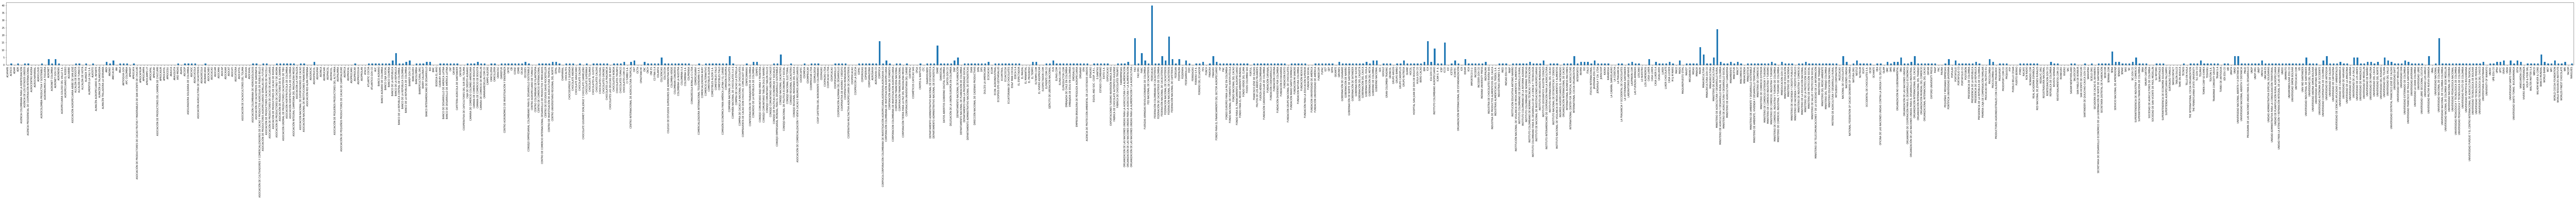

In [36]:
data[actores].sum(axis=0).plot.bar(figsize=(200,5))

In [37]:
for actor in actores:
    if data[actor].sum() == 0:
        data.drop(actor,inplace=True, axis=1)

In [38]:
clean_actores = [x for x in data.columns]

In [39]:
clean_actores.remove("text")

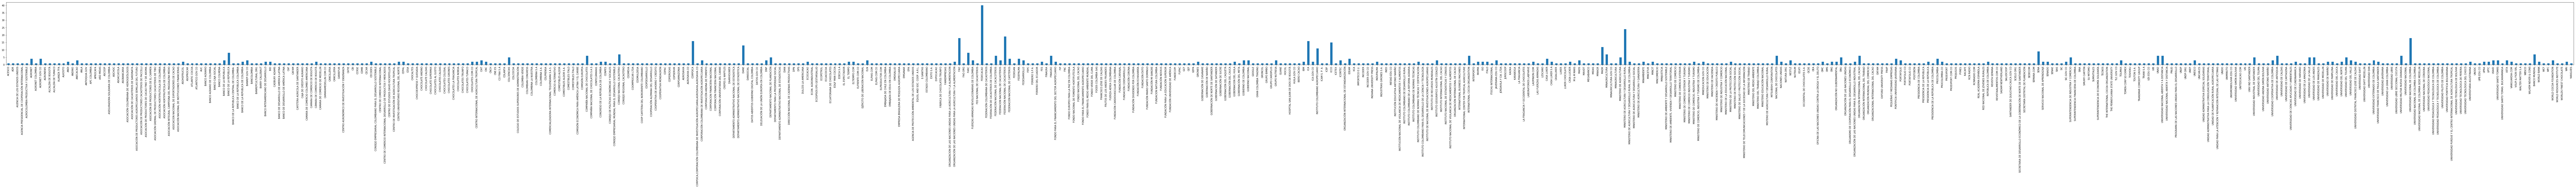

In [40]:
data[clean_actores].sum(axis=0).plot.bar(figsize=(200,5))

In [41]:
X = []
sentences = list(data["text"])
for sen in sentences:
     X.append(sen)

In [42]:
X

['reconocimiento territorial participativo serrania yariguies microcuenca cinco mil santander colombia participatory territorial recognition of the serrania yariguies cinco mil microbasin santander colombia paulina alejandra vergara buitragoingeniera ambiental especialista gestion ambiental ms c geografia universidad pedagogica tecnologica colombia grupo sistematica biologica sisbio paulinavergara uptceducoresumenla serrania yariguies ubicada departamento santander constituye ecosistema estrategico oriente andes colombianos embargo microcuenca cinco mil ubica serrania actividad agropecuaria impactado areas naturales protegidas presentes parque nacional natural distrito manejo integrado yariguies investigacion realizo proceso participativo zona rural microcuenca proposito sistematizar informacion percepciones campesinos territorio resultados muestran vinculacion comunidad conocimientos conservacion ecosistemas areas naturales protegidaspalabras clave clase campesina comunidad conservaci

In [43]:
y = data[clean_actores]

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential

words = data["text"].str.lower().str.split()
final_words = []
for x in words:
    for word in x:
        final_words.append(word)
    
unique = set(final_words) 
len(unique)

53900

In [45]:
#tokenizer = Tokenizer(num_words=53937)
#tokenizer.fit_on_texts(data["text"])  #Then, we create the text->indices mapping. 

In [46]:
#train, test = train_test_split(data, random_state=1337, test_size=0.25, shuffle=True)

In [47]:
#train_sequences = tokenizer.texts_to_sequences(train["text"])
#test_sequences = tokenizer.texts_to_sequences(test["text"])
#train_sequences = pad_sequences(train_sequences,maxlen=150000)
#test_sequences = pad_sequences(test_sequences,maxlen=150000)

In [48]:
#sizes = []
#for x in train["text"]:
#    sizes.append(len(x))

In [49]:
#train_sequences = pad_sequences(train_sequences,maxlen=max(sizes))
#test_sequences = pad_sequences(test_sequences,maxlen=max(sizes))

In [50]:
#y_train = train[clean_actores]
#y_test = test[clean_actores]

In [51]:
#from sklearn.linear_model import LogisticRegression
#from skmultilearn.problem_transform import LabelPowerset
#from sklearn.metrics import f1_score,accuracy_score
#lp_classifier = LabelPowerset(LogisticRegression())
#lp_classifier.fit(train_sequences, y_train)
#lp_predictions = lp_classifier.predict(test_sequences)

In [52]:
#print("Accuracy = ",accuracy_score(y_test,lp_predictions))
#print("F1 score = ",f1_score(y_test,lp_predictions, average="micro"))
##Por regresión logística es imposible.

In [53]:
#y_train.shape[1]

In [54]:
#max(sizes)

In [55]:
#model = Sequential()
#model.add(Dense(100, input_dim=max(sizes), kernel_initializer='he_uniform', activation='relu'))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(256, activation="relu"))
#model.add(Dense(567, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
#model.summary()

In [57]:
#model.fit(train_sequences, y_train, validation_split=0.3, epochs=100)

In [58]:
#y_train.shape[1]

In [59]:
data["text"]

0     reconocimiento territorial participativo serra...
1     acuerdo voluntades actores publico privados go...
2     agenda prospectivade investigaciony desarrollo...
3     carbon storage in cacao theobroma cacao planta...
4     analisis beneficios tributarios colombia inver...
                            ...                        
68    instituto investigacion recursos biologicos al...
69    cooperativismo responsabilidad social empresar...
70    estudio caso hit postobon inclusion desarrollo...
71    SSmoralesmachuca carlos andres ingeniero siste...
72    universidad militar nueva granada programa con...
Name: text, Length: 73, dtype: object

In [60]:
def simple_extract(x):
    for actor in clean_actores:
        finded = actor+'_simple_finded'
        act_freq = actor+'_simple_frecuency'
        find_vector = [m.start() for m in re.finditer(actor.lower(), x["text"])]
        if len(find_vector) > 0:
            x[finded] = 1
            x[act_freq] = len(find_vector)
        else:
            x[finded] = 0
            x[act_freq] = 0
    return x

In [61]:
def simple_extract_sinom(x):
    for actor in clean_actores:
        for sinom in sinonimos[actor]: 
            finded = actor+'_'+sinom+'_simple_finded'
            act_freq = actor+'_'+sinom+'_simple_frecuency'
            find_vector = [m.start() for m in re.finditer(sinom.lower(), x["text"])]
            if len(find_vector) > 0:
                x[finded] = 1
                x[act_freq] = len(find_vector)
            else:
                x[finded] = 0
                x[act_freq] = 0
    return x

In [62]:
def extract_sinom_distance(x):
    for actor in clean_actores:
        for sinom in sinonimos[actor]: 
            name = actor+'_'+sinom+'_distance'
            similarity = model.wmdistance(x["text"], sinom.lower())
            x[name] = similarity
    return x

In [63]:
new_variables = []
for actor in clean_actores:
    for sinom in sinonimos[actor]:
        finded = actor+'_'+sinom+'_simple_finded'
        act_freq = actor+'_'+sinom+'_simple_frecuency'
        name = actor+'_'+sinom+'_distance'
        new_variables.append(finded)
        new_variables.append(act_freq)
        new_variables.append(name)
        
for actor in clean_actores:
    finded = actor+'_simple_finded'
    act_freq = actor+'_simple_frecuency'
    new_variables.append(finded)
    new_variables.append(act_freq)

In [64]:
data = data.apply(simple_extract, axis=1)
data = data.apply(simple_extract_sinom, axis=1)
data = data.apply(extract_sinom_distance, axis=1)

In [65]:
data[new_variables]

ACESCO_Acesco_simple_finded  ACESCO_Acesco_simple_frecuency  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
..                          ...                             ...   
68                            0                               0   
69                            1                               1   
70                            0                               0   
71                            0                               0   
72                            0                               0   

    ACESCO_Acesco_distance  ADR_ADR_simple_finded  ADR_ADR_simple_frecuency  \
0                13.337815                      0                         0   
1                12.814253                      1                         5   
2                12.675115                      1                        29   
3                11.553342                      0                         0   
4                13.140375                      1                         1   
..                     ...                    ...                       ...   
68               13.565716                      1                         4   
69               12.900761                      1                        63   
70               13.085131                      1                         4   
71               13.513396                      1                         3   
72               13.049804                      0                         0   

    ADR_ADR_distance  ADR_ Agencia de Desarrollo Rural_simple_finded  \
0          20.992429                                               0   
1          20.922322                                               0   
2          20.963653                                               0   
3          19.619342                                               0   
4          21.167052                                               0   
..               ...                                             ...   
68         21.252838                                               0   
69         20.881664                                               0   
70         20.789058                                               0   
71         21.348501                                               0   
72         20.983399                                               0   

    ADR_ Agencia de Desarrollo Rural_simple_frecuency  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
..                                                ...   
68                                                  0   
69                                                  0   
70                                                  0   
71                                                  0   
72                                                  0   

    ADR_ Agencia de Desarrollo Rural_distance  \
0                                    7.720625   
1                                    7.541102   
2                                    7.688345   
3                                    7.126004   
4                                    7.728822   
..                                        ...   
68                                   8.131140   
69                                   7.675629   
70                                   7.741403   
71                                   8.260934   
72                                   8.479787   

    AGENCIA DE LOS ESTADOS UNIDOS_Agencia de los Estados Unidos_simple_finded  \
0                             

In [66]:
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import f1_score,accuracy_score
lp_classifier = LabelPowerset(LogisticRegression(C=1e5, solver="newton-cg", multi_class="ovr"))
lp_classifier.fit(data[new_variables], data[clean_actores])
lp_predictions = lp_classifier.predict(data[new_variables])

In [67]:
print("Accuracy = ",accuracy_score(data[clean_actores],lp_predictions))
print("F1 score = ",f1_score(data[clean_actores],lp_predictions, average="micro"))

Accuracy =  1.0
F1 score =  1.0


In [68]:
to_predict = pd.DataFrame({'File': ['','','','']})
to_predict['text'] = df_final['File'].apply(extract_text)

KeyError: 'File'

In [ ]:
to_predict['text'] = to_predict['text'].apply(lambda x: x.replace('\n-', ''))
to_predict['text'] = to_predict['text'].apply(lambda x: x.replace('\n', ''))
to_predict['text'] = to_predict['text'].apply(lambda x: x.replace('.', ''))
to_predict['text'] = to_predict['text'].apply(lambda x: x.replace(',', ''))
to_predict['text'] = to_predict['text'].apply(lambda x: x.replace(':', ''))
to_predict['text'] = to_predict['text'].apply(lambda x: x.replace(';', ''))

In [69]:
data[clean_actores+["text"]+new_variables].to_excel('./DataWithNewVariables.xlsx', index=False)

In [ ]:
!pip install openpyxl

In [70]:
data[clean_actores+["text"]+new_variables].to_json('./DataWithNewVariables.json')

ValueError: DataFrame columns must be unique for orient='columns'.

In [ ]:
data.columns

In [ ]:
def checkIfDuplicates_1(listOfElems):
    ''' Check if given list contains any duplicates '''
    if len(listOfElems) == len(set(listOfElems)):
        return False
    else:
        return True